# F21 AA. CW 1
# TASK 4 Model Training ,tuning and evaluation

# Logistic Regression Model

Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import mglearn
import matplotlib.pyplot as plt
# Custom PreprocessAndNorm.pynb module to perform preprocessing and Normalization for function reuse
%run ProcessingAndNorm.ipynb

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pa

Inputs - train Data 

In [2]:
# Preprocessed data from step 2 which used Stemming
df_reviews_p_s = pd.read_csv('df_reviews_p_s.csv')
df_reviews_p_s.head()

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
0,0,5,good receiv product earli seller tastey great ...,103,16,104,24
1,1,5,organ kosher tasti assort premium tea teasan n...,1195,193,803,126
2,2,5,excel glutenfr spaghetti great tast great stru...,609,101,537,103
3,3,5,lindt lindt buy multipack misl pictur whole ha...,117,19,84,15
4,4,5,yum bar good love warm definit think great sna...,88,14,76,15


In [3]:
# Preprocessed data from step 2 which used Lemmatization
df_reviews_p_l = pd.read_csv('df_reviews_p_l.csv')
df_reviews_p_l.head()

,Unnamed: 0,Score,Summary_text,length,word_count,length_change,wordcount_change
0,0,5,good received product early seller tastey grea...,109,16,98,24
1,1,5,organic kosher tasty assortment premium tea te...,1334,193,664,126
2,2,5,excellent glutenfree spaghetti great taste gre...,690,101,456,103
3,3,5,lindt lindt buying multipack misled picture wh...,138,19,63,15
4,4,5,yum bar good loved warmed definitely think gre...,98,14,66,15


Inputs - Test Data

In [5]:
df_test=pd.read_csv('test.csv')
df_label=pd.read_csv('labels.csv')


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142114 entries, 0 to 142113
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      142114 non-null  int64 
 1   ProductId               142114 non-null  object
 2   UserId                  142114 non-null  object
 3   ProfileName             142112 non-null  object
 4   HelpfulnessNumerator    142114 non-null  int64 
 5   HelpfulnessDenominator  142114 non-null  int64 
 6   Time                    142114 non-null  int64 
 7   Summary                 142107 non-null  object
 8   Text                    142114 non-null  object
dtypes: int64(4), object(5)
memory usage: 9.8+ MB


In [7]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142114 entries, 0 to 142113
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Id      142114 non-null  int64
 1   Score   142114 non-null  int64
dtypes: int64(2)
memory usage: 2.2 MB


Reuse preprocessing done in task 2

In [8]:
df_test_data = pd.merge(df_label, df_test, on='Id')
df_test_data.Summary.fillna('',inplace=True)
df_test_data.Text.fillna('', inplace=True)
df_test_data['Summary_text']=df_test_data['Summary']+" "+df_test_data['Text']
df_test_data = df_test_data[['Score','Summary_text']]
df_test_data['Score']=df_test_data.Score.astype('category')
df_test_data=Perform_Preprocessing(df_test_data)
df_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142114 entries, 0 to 142113
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Score         142114 non-null  category
 1   Summary_text  142114 non-null  object  
dtypes: category(1), object(1)
memory usage: 2.3+ MB


In [9]:
X_test=df_test_data['Summary_text']
X_test

0         love flavor fog chaser best flavor body far pr...
1         tasty tea found pf changs tastes great 16 bags...
2         yum quite chocolate bar substitute delicious a...
3         gluten free biscotti tasty pamelas almond bisc...
4         happy puppies hrefhttpwwwamazoncomgpproductb00...
                                ...                        
142109    great treats buying store hard time keeping st...
142110    nongmo magnesium boost glad companies making p...
142111    real thing similar love real scottish haggis b...
142112    wow awesome syrup eat lot syrup house three ye...
142113    dog buy give dog needs lose weight gets hungry...
Name: Summary_text, Length: 142114, dtype: object

In [10]:

Y_test=df_test_data['Score']
Y_test

0         5
1         5
2         5
3         3
4         4
         ..
142109    5
142110    5
142111    4
142112    5
142113    5
Name: Score, Length: 142114, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

## Model Building,tuning and evaluation

### 1) Preprocessed data with stemming

Define train data

In [11]:
X_train=df_reviews_p_s['Summary_text']
Y_train=df_reviews_p_s['Score']

#### a) Bag of words

Create pipeline

In [12]:
pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer='word',min_df=25)),  # strings to token integer counts
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


Create parameter grid

In [13]:
param_grid1 = { 'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100],
                "bow__ngram_range": [(1, 1),(1,2),(2,2)]}

grid1 = GridSearchCV(pipeline1, param_grid1, cv=3)


Use grid to find beest hyperparameters

In [14]:
grid1.fit(X_train, Y_train)
print("Best cross-validation score: {:.2f}".format(grid1.best_score_))

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

Best cross-validation score: 0.79


C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Print scores

In [15]:
scores1 = grid1.cv_results_['mean_test_score'].reshape(-1, 2).T
scores1

array([[0.71395365, 0.74936905, 0.74850589, 0.72157668, 0.79293521,
        0.78638411, 0.65003753, 0.77023033, 0.76769949],
       [0.74049351, 0.74851762, 0.74817517, 0.76654548, 0.78971713,
        0.78550687, 0.71149552, 0.77662429, 0.76432425]])

Display Heat map of scores vs parameters

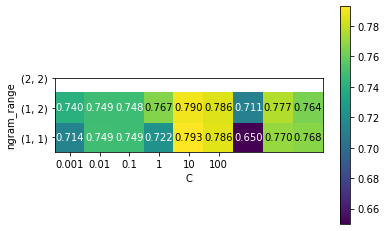

In [16]:
# visualize heat map

heatmap1 = mglearn.tools.heatmap(
    scores1, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid1['classifier__C'],
    yticklabels=param_grid1['bow__ngram_range'])
plt.colorbar(heatmap1)

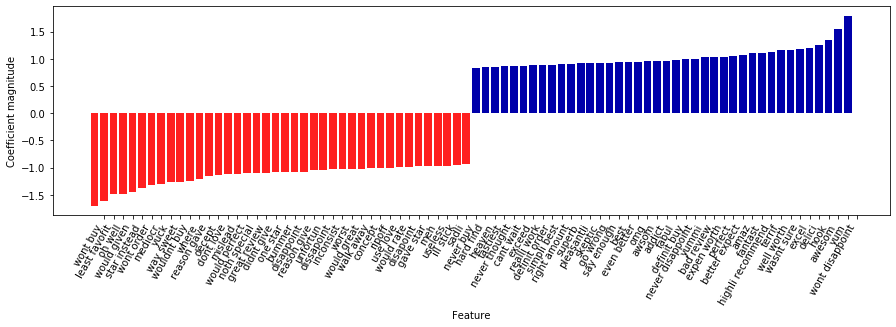

In [17]:
vectorizer = grid1.best_estimator_.named_steps["bow"]
# transform the training dataset:
xt = vectorizer.transform(X_train)
# find maximum value for each of the features over dataset:
max_value = xt.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
mglearn.tools.visualize_coefficients(
    grid1.best_estimator_.named_steps["classifier"].coef_[4],
    feature_names, n_top_features=40)


Tuned pipeline

In [18]:
pipe1 = Pipeline([
    ('bow', CountVectorizer(analyzer='word',ngram_range=(1,2),min_df=25)),  # strings to token integer counts
    ('classifier', LogisticRegression(C = 1)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Fit train data

In [19]:
pipe1.fit(X_train,Y_train)

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=25,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                     

Predict values for test data

In [20]:
predictions1 = pipe1.predict(X_test)

Print Result

In [21]:
print(classification_report(predictions1,Y_test))

              precision    recall  f1-score   support

           1       0.60      0.60      0.60     13021
           2       0.27      0.39      0.32      5003
           3       0.35      0.47      0.41      7981
           4       0.30      0.49      0.37     12399
           5       0.91      0.80      0.85    103710

    accuracy                           0.72    142114
   macro avg       0.49      0.55      0.51    142114
weighted avg       0.78      0.72      0.74    142114



#### b) Tf-IDF vectorization

Create Pipeline

In [22]:
pipeline2 = Pipeline([
    ('Tfidf', TfidfVectorizer(min_df=25)),  # strings to token integer counts
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Create parameter grid

In [23]:
param_grid2 = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
               "Tfidf__ngram_range": [(1, 1),(1,2),(2,2)]}



grid2 = GridSearchCV(pipeline2, param_grid2, cv=3)

Fit training data

In [24]:
grid2.fit(X_train, Y_train)
print("Best cross-validation score: {:.2f}".format(grid2.best_score_))

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

Best cross-validation score: 0.78


C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Print Results

In [25]:
scores2 = grid2.cv_results_['mean_test_score'].reshape(-1, 2).T
scores2

array([[0.63914247, 0.7332012 , 0.74660131, 0.63914247, 0.73603696,
        0.77921143, 0.63914247, 0.6820941 , 0.76926867],
       [0.67157433, 0.74723695, 0.74594221, 0.65044565, 0.77516536,
        0.77638739, 0.63937468, 0.76407328, 0.76659005]])

Display results as a heat map

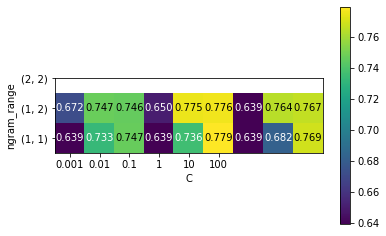

In [26]:
# visualize heat map

heatmap2 = mglearn.tools.heatmap(
    scores2, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid2['classifier__C'],
    yticklabels=param_grid2['Tfidf__ngram_range'])
plt.colorbar(heatmap2)

Tuned pipeline

In [27]:
pipe2 = Pipeline([
    ('Tfidf', TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=25)),  # strings to token integer counts
    ('classifier', LogisticRegression(C =1)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])



Fit training data

In [28]:
pipe2.fit(X_train,Y_train)

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('Tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=25, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_s

Make predictions on test data

In [29]:
predictions2 = pipe2.predict(X_test)

Print results

In [30]:
print(classification_report(predictions2,Y_test))

              precision    recall  f1-score   support

           1       0.61      0.60      0.60     13225
           2       0.21      0.38      0.27      4205
           3       0.34      0.43      0.38      8498
           4       0.29      0.46      0.35     12795
           5       0.91      0.80      0.85    103391

    accuracy                           0.71    142114
   macro avg       0.47      0.53      0.49    142114
weighted avg       0.77      0.71      0.74    142114



### 2) Preprocessed data with lemmatization

Set train data 

In [31]:
X_train2=df_reviews_p_l['Summary_text']
Y_train2=df_reviews_p_l['Score']

#### a) Bag of words

Create Pipeline

In [32]:
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer='word',min_df=25)),  # strings to token integer counts
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Create parameter grid

In [33]:
param_grid3 = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
               "bow__ngram_range": [(1, 1),(1,2),(2,2)]}



grid3 = GridSearchCV(pipeline3, param_grid3, cv=3)



Fit training data

In [34]:
grid3.fit(X_train2, Y_train2)
print("Best cross-validation score: {:.2f}".format(grid3.best_score_))

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

Best cross-validation score: 0.79


C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Print results

In [35]:
scores3 = grid3.cv_results_['mean_test_score'].reshape(-1, 2).T
scores3

array([[0.71275742, 0.75436741, 0.75406952, 0.71999812, 0.79386171,
        0.78731294, 0.6478421 , 0.76578552, 0.76375663],
       [0.74251302, 0.75431112, 0.75370831, 0.76659474, 0.79119951,
        0.78663743, 0.70601867, 0.77386593, 0.76285593]])

Display Heatmap of results

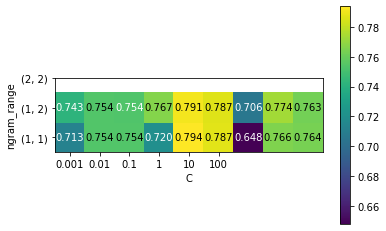

In [36]:
# visualize heat map
heatmap3 = mglearn.tools.heatmap(
    scores3, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid3['classifier__C'],
    yticklabels=param_grid3['bow__ngram_range'])
plt.colorbar(heatmap3)

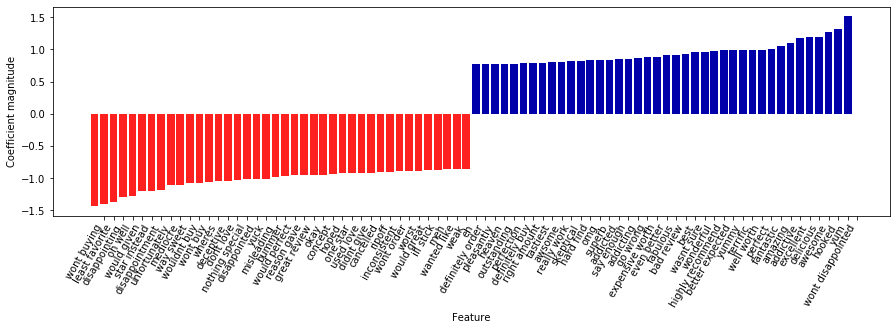

In [51]:
vectorizer3 = grid3.best_estimator_.named_steps["bow"]
# transform the training dataset:
xt3 = vectorizer3.transform(X_train2)
# find maximum value for each of the features over dataset:
max_value3 = xt3.max(axis=0).toarray().ravel()
sorted_by_tfidf3 = max_value3.argsort()
feature_names3 = np.array(vectorizer3.get_feature_names())
mglearn.tools.visualize_coefficients(
    grid3.best_estimator_.named_steps["classifier"].coef_[4],
    feature_names3, n_top_features=40)

Finetuned Pipe

In [37]:
pipe3 = Pipeline([
    ('bow', CountVectorizer(analyzer='word',ngram_range=(1,2),min_df=25)),  # strings to token integer counts
    ('classifier', LogisticRegression(C =1)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])



Fit training data

In [38]:
pipe3.fit(X_train2,Y_train2)

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=25,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                     

Make predictions on test data

In [39]:
predictions3 = pipe3.predict(X_test)

Print Results

In [40]:
print(classification_report(predictions3,Y_test))

              precision    recall  f1-score   support

           1       0.77      0.74      0.75     13635
           2       0.43      0.55      0.48      5850
           3       0.51      0.56      0.54      9610
           4       0.43      0.60      0.50     14582
           5       0.94      0.86      0.90     98437

    accuracy                           0.79    142114
   macro avg       0.62      0.66      0.63    142114
weighted avg       0.82      0.79      0.80    142114



#### b) Tf-IDF vectorization

Create Pipeline

In [41]:
pipeline4 = Pipeline([
    ('Tfidf', TfidfVectorizer(analyzer='word',min_df=25)),  # strings to token integer counts
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Create parameter grid

In [42]:
param_grid4 = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
               "Tfidf__ngram_range": [(1, 1),(1,2),(2,2)]}




grid4 = GridSearchCV(pipeline4, param_grid4, cv=3)




Fit Training data

In [43]:
grid4.fit(X_train2, Y_train2)
print("Best cross-validation score: {:.2f}".format(grid4.best_score_))

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

Best cross-validation score: 0.78


C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Display results

In [44]:
scores4 = grid4.cv_results_['mean_test_score'].reshape(-1, 2).T
scores4 

array([[0.63914247, 0.73399634, 0.74998593, 0.63914247, 0.73548107,
        0.77814186, 0.63914247, 0.68070788, 0.76435709],
       [0.66709199, 0.75080922, 0.74952385, 0.64863958, 0.77726462,
        0.77689638, 0.6393653 , 0.76309518, 0.7580546 ]])

Display heatmap of results

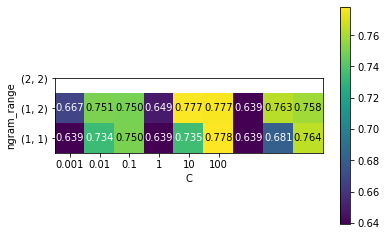

In [45]:
# visualize heat map

heatmap4 = mglearn.tools.heatmap(
    scores4, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
    xticklabels=param_grid4['classifier__C'],
    yticklabels=param_grid4['Tfidf__ngram_range'])
plt.colorbar(heatmap4)

Finetuned pipeline

In [46]:
pipe4 = Pipeline([
    ('Tfidf', TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=25)),  # strings to token integer counts
    ('classifier', LogisticRegression(C =1)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])



Fit train data

In [47]:
pipe4.fit(X_train2,Y_train2)

C:\Users\ASUS\Anaconda3\envs\AppliedText\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('Tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=25, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_s

Predict for test data

In [48]:
predictions4 = pipe4.predict(X_test)

Display Results

In [49]:
print(classification_report(predictions4,Y_test))

              precision    recall  f1-score   support

           1       0.75      0.70      0.73     14062
           2       0.29      0.56      0.39      3896
           3       0.42      0.54      0.47      8405
           4       0.33      0.59      0.42     11220
           5       0.96      0.83      0.89    104531

    accuracy                           0.77    142114
   macro avg       0.55      0.64      0.58    142114
weighted avg       0.84      0.77      0.80    142114

